In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


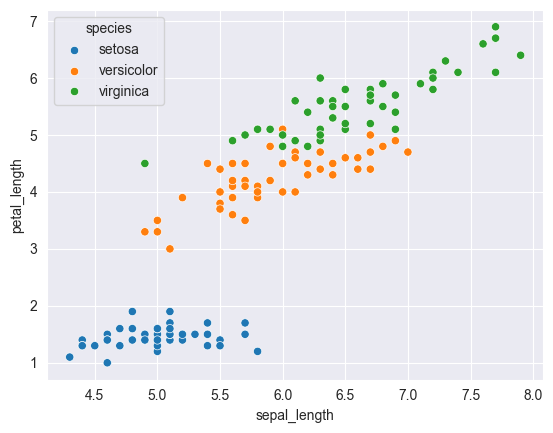

In [3]:
sns.scatterplot(data=iris_df, x="sepal_length", y="petal_length", hue="species")
plt.show()

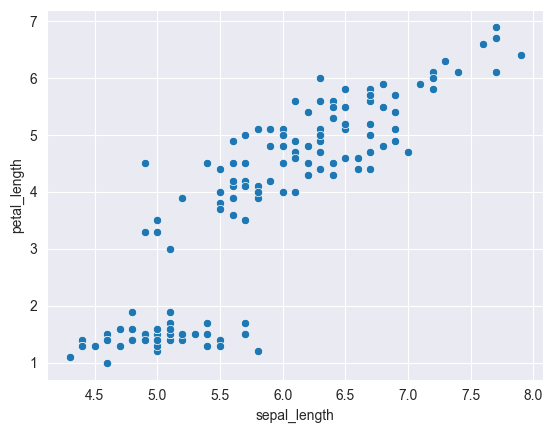

In [4]:
sns.scatterplot(data=iris_df, x="sepal_length", y="petal_length")
plt.show()

In [5]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Clustering

## K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding the best cluster center (centroid) for each cluster. Each object is assigned to the cluster with the closest centroid. The algorithm then iteratively updates the centroids to minimize the sum of the squared Euclidean distances between the data points and their respective cluster centroids.

The algorithm is as follows:

1. Pick K random points as the initial cluster centers called centroids.
2. Assign each data point to the closest centroid.
3. For each cluster of classified objects, compute the centroid by taking the mean of all the data points assigned to that cluster.
4. Reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (the measure of goodness)
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [8]:
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [9]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

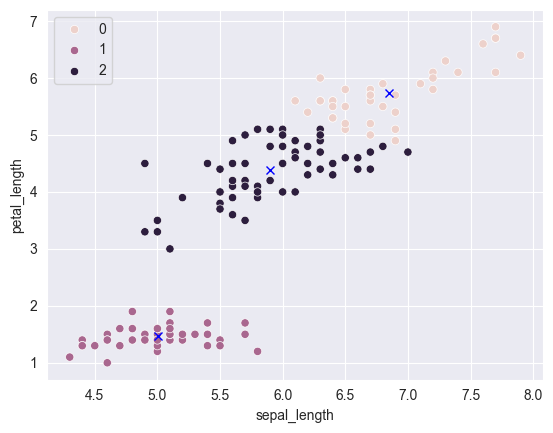

In [10]:
sns.scatterplot(data=iris_df, x="sepal_length", y="petal_length", hue=preds)
centers_x, centers_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 2]
plt.plot(centers_x, centers_y, "xb")
plt.show()

The "goodness" of the fit is provided throught the `model.inertia_` attribute, which is the sum of squared distances of samples to their closest cluster center. Lower values of `model.inertia_` are better.

In [11]:
model.inertia_

78.85144142614601

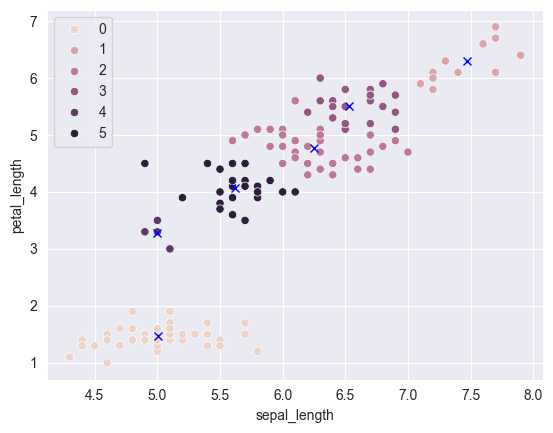

In [12]:
# 6 clusters
model = KMeans(n_clusters=6).fit(X)
preds = model.predict(X)
sns.scatterplot(data=iris_df, x="sepal_length", y="petal_length", hue=preds)
centers_x, centers_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 2]
plt.plot(centers_x, centers_y, "xb")
plt.show()

In [13]:
model.inertia_

42.23711111111112

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" and pick the number of clusters where the inertia starts decreasing at a slower rate.

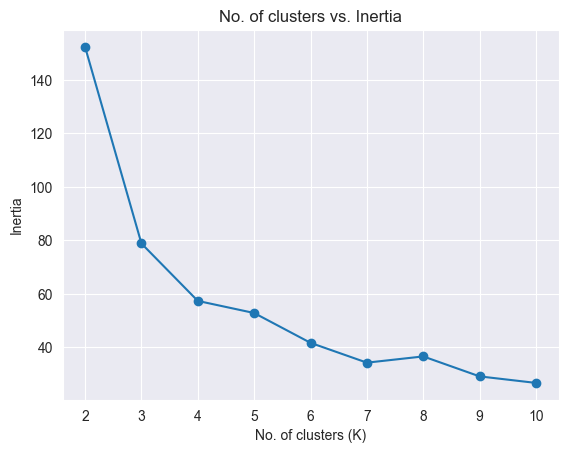

In [14]:
options = range(2, 11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters=n_clusters).fit(X)
    inertias.append(model.inertia_)

plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, "-o")
plt.xlabel("No. of clusters (K)")
plt.ylabel("Inertia")
plt.show()

The chart creates an "elbow" plot, which looks like an arm with an elbow. The elbow point is the number of clusters you should choose.

**Mini Batch K-Means**: The K-means algorithm can be slow for large datasets. Mini Batch K-Means is a variant of the K-means algorithm that uses small random batches of data to reduce the computation time. It's generally faster than K-means, but the quality of the clusters may not be as good.

## DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has 2 main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

Steps of the algorithm:

1. Randomly select a point that has not been visited.
2. Find all points in the epsilon neighborhood of the point, and expand the cluster.
3. If a point is found to be a core point, then all points in its epsilon neighborhood are added to the cluster.
4. Repeat the process until all points are visited.
5. The clusters are formed based on the reachability of points. If a point is reachable from another point, then they belong to the same cluster.

***Note***: DBSCAN is not suitable for clusters of varying densities. The number of clusters is not predetermined, and the algorithm can find any number of clusters.

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
model = DBSCAN(eps=1.1, min_samples=4).fit(X)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs

In [17]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

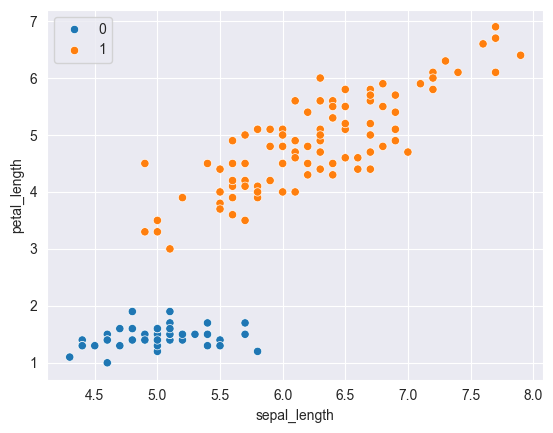

In [18]:
sns.scatterplot(data=X, x="sepal_length", y="petal_length", hue=model.labels_)
plt.show()

**When to use DBSCAN and K-Means**:

- Use K-Means when the number of clusters is known and the data is well separated. Distance-based algorithms like K-Means are sensitive to the scale of the data. You can classify new data points using the trained model.
- Use DBSCAN when the number of clusters is not known and the data is not well separated. DBSCAN is also insensitive to the scale of the data. It can capture clusters of complex shapes and sizes. You can't classify new data points using the trained model.
- Use Mini Batch K-Means when the dataset is large.

## Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the 2 closest cluster centers without a parent and combine them into a single cluster.
3. The new cluster is the parent cluster of the 2 clusters, and its center is the mean of the 2 clusters.
4. Repeat steps 2 and 3 until all points are in a single cluster.

The hierarchy of clusters can be visualized using a *dendrogram*. The height of the *dendrogram* at which 2 clusters are merged represents the distance between the 2 clusters.

# Dimensionality Reduction and Manifold Learning

In ML, the number of features in the dataset is called the dimensionality of the data. High-dimensional data can be difficult to visualize and can lead to overfitting. Dimensionality reduction is the process of reducing the number of features in the dataset.

Applications of dimensionality reduction:

- Reducing size of the data without losing much information
- training ML models efficiently
- Visualizing high-dimensional data in 2D or 3D

## Principal Component Analysis (PCA)

Principle component is a dimensionality reduction technique that uses linear algebra to transform the dataset into a lower-dimensional space. The new dimensions are called principal components. The first principal component captures the maximum variance in the data, and each subsequent component captures less variance. It attempts to find the directions of maximum variance in the data.

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
pca.fit(X)

PCA(n_components=2)

In [23]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [25]:
transformed = pca.transform(X)
transformed[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

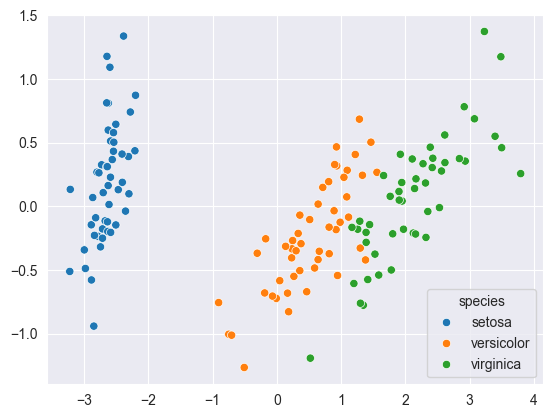

In [26]:
sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=iris_df["species"])
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. t-SNE is a popular manifold learning technique that is used for exploring high-dimensional data. It maps the high-dimensional data to a low-dimensional space, typically 2D or 3D. It's particularly useful for visualizing high-dimensional data.

**When to use PCA and t-SNE, and their differences**:

- Use PCA when you want to reduce the dimensionality of the data and the data is linearly separable. PCA is a linear technique that works well when the data is linearly separable. It's faster than t-SNE.
- Use t-SNE when you want to visualize high-dimensional data in 2D or 3D. t-SNE is a non-linear technique that works well for visualizing complex data. It's slower than PCA.

In [27]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(X)

In [30]:
transformed[:5]

array([[-26.62385  ,  -2.969567 ],
       [-29.334204 ,  -2.056246 ],
       [-29.084578 ,  -3.2681649],
       [-29.577831 ,  -2.9022093],
       [-26.578043 ,  -3.3951583]], dtype=float32)

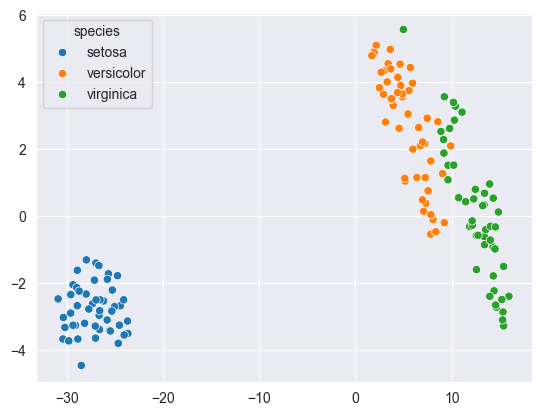

In [29]:
sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=iris_df["species"])
plt.show()